<AxesSubplot:xlabel='address', ylabel='2016'>

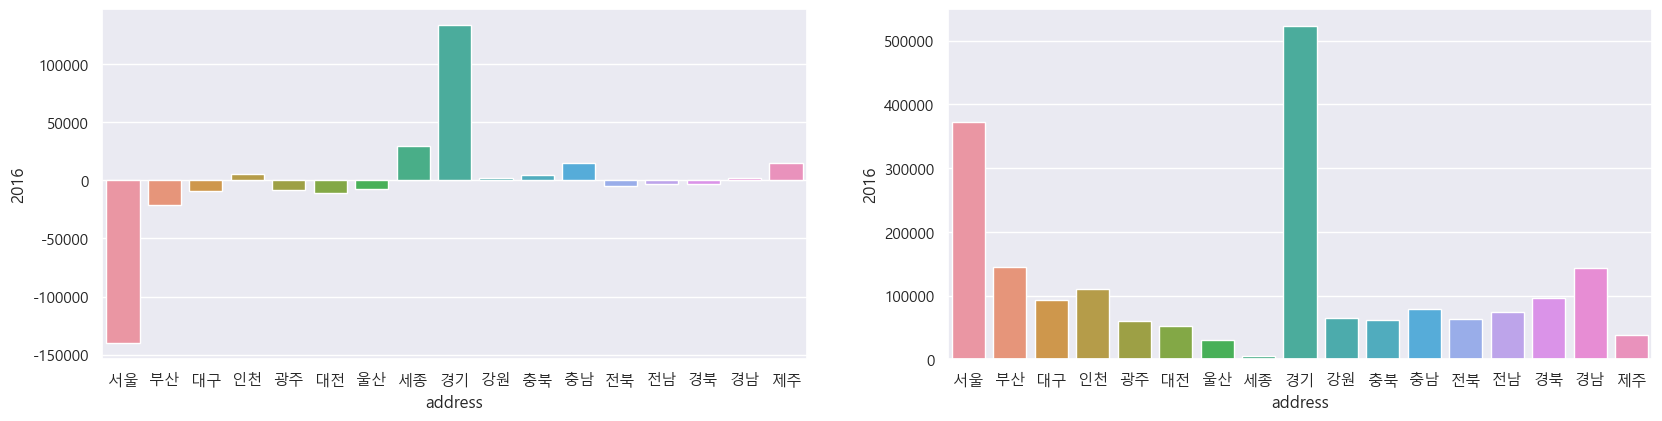

In [133]:
# 딕셔너리를 데이터프래임으로 변환해주는 함수
def makeDataFrame(dic):
    _dataFrame = []
    for k, v in dic.items():
        temp = {}
        temp["address"] = k

        for idx in range(len(years)):
            temp[years[idx]] = v[idx]

        _dataFrame.append(temp)

    return pd.DataFrame(_dataFrame)

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc("font", family = "Malgun Gothic")

years = ["2016", "2017", "2018", "2019", "2020"]

crimes = pd.read_csv("범죄발생총건수.csv", encoding="cp949")
crimes_diary = []
cData = {}

for date_column in crimes.columns.delete(0):
    key = crimes[date_column][0]
    value = int(crimes[date_column][1])

    if key in cData :
        cData[key].append(value)
    else:
        cData[key] = [value]

crimes_diary = makeDataFrame(cData)

population = pd.read_csv("거주지이동인구.csv", encoding="cp949")
population_doc = []
pData = {}

for _column in range(population.shape[0]):
    _list = list(population.loc[_column])
    key = _list[0]
    value = _list[1:]

    pData[key] = value

population_doc = makeDataFrame(pData)

# 두 데이터 시각화
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

sns.barplot(data=population_doc, x='address', y='2016', ax=ax1)
sns.barplot(data=crimes_diary, x='address', y='2016', ax=ax2)

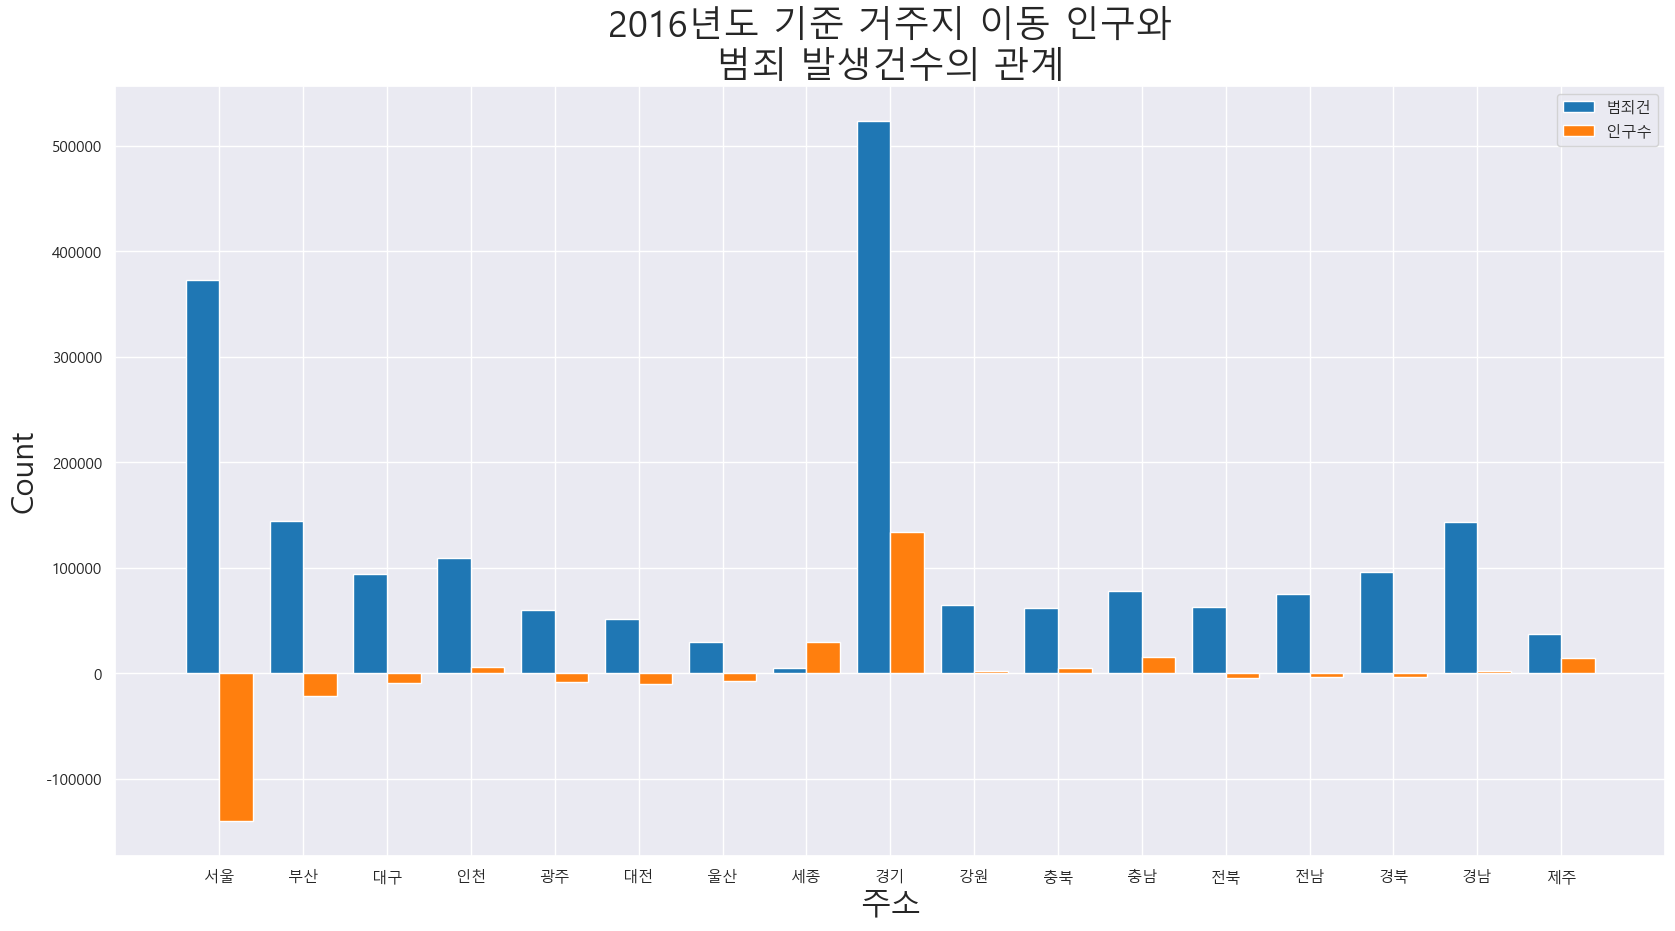

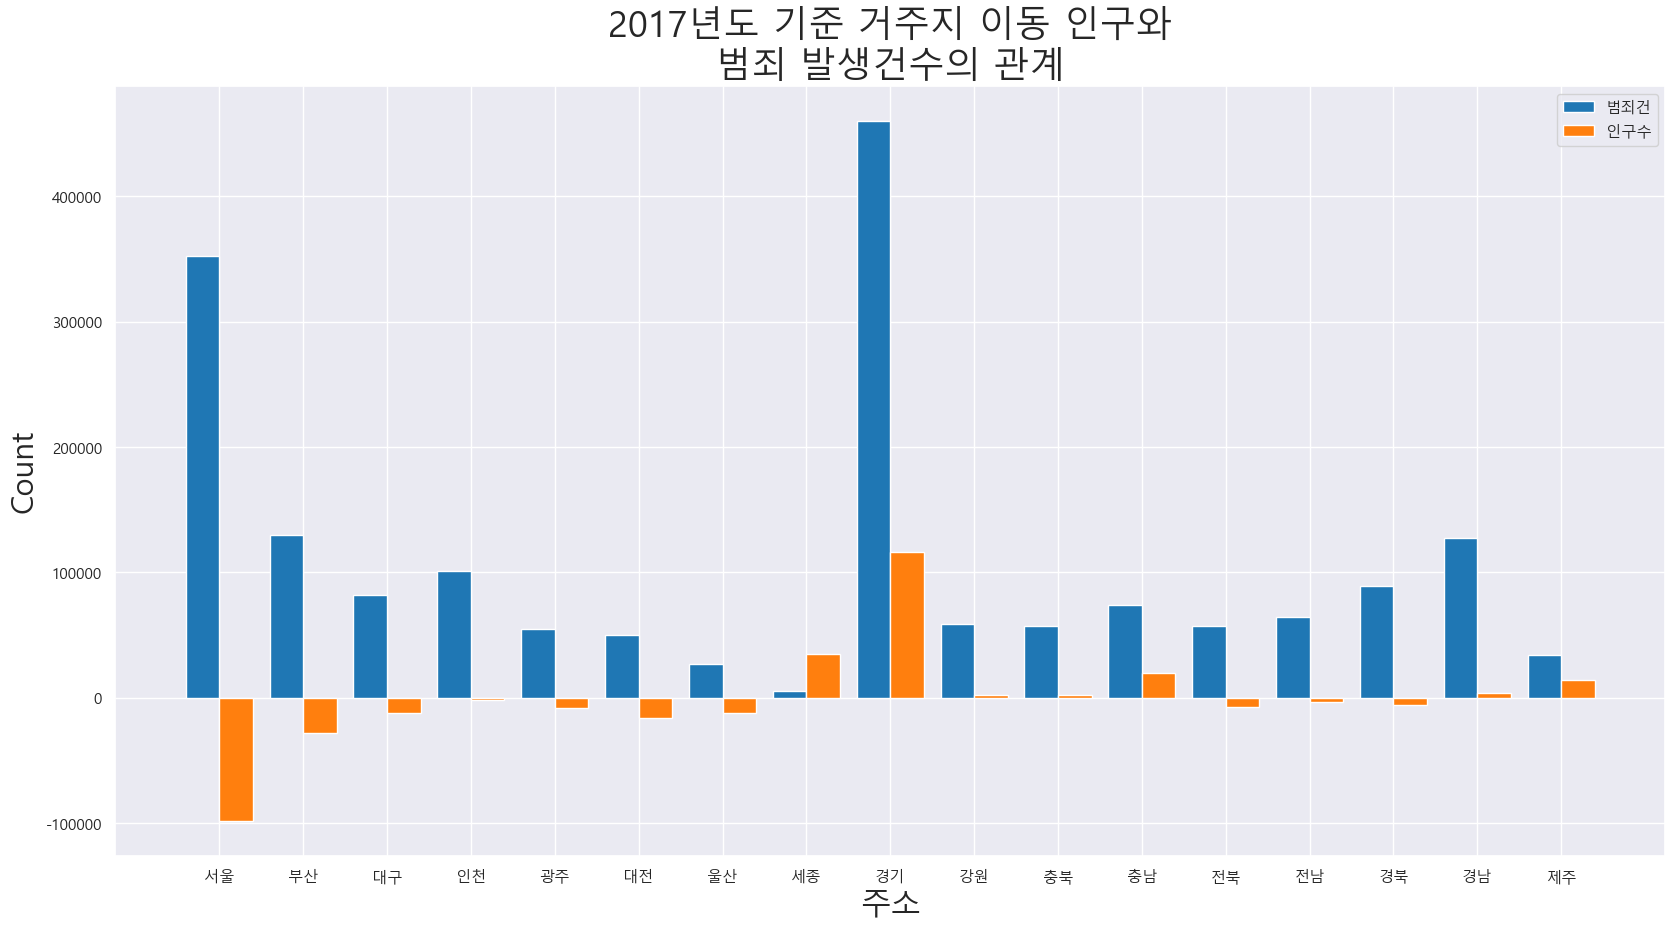

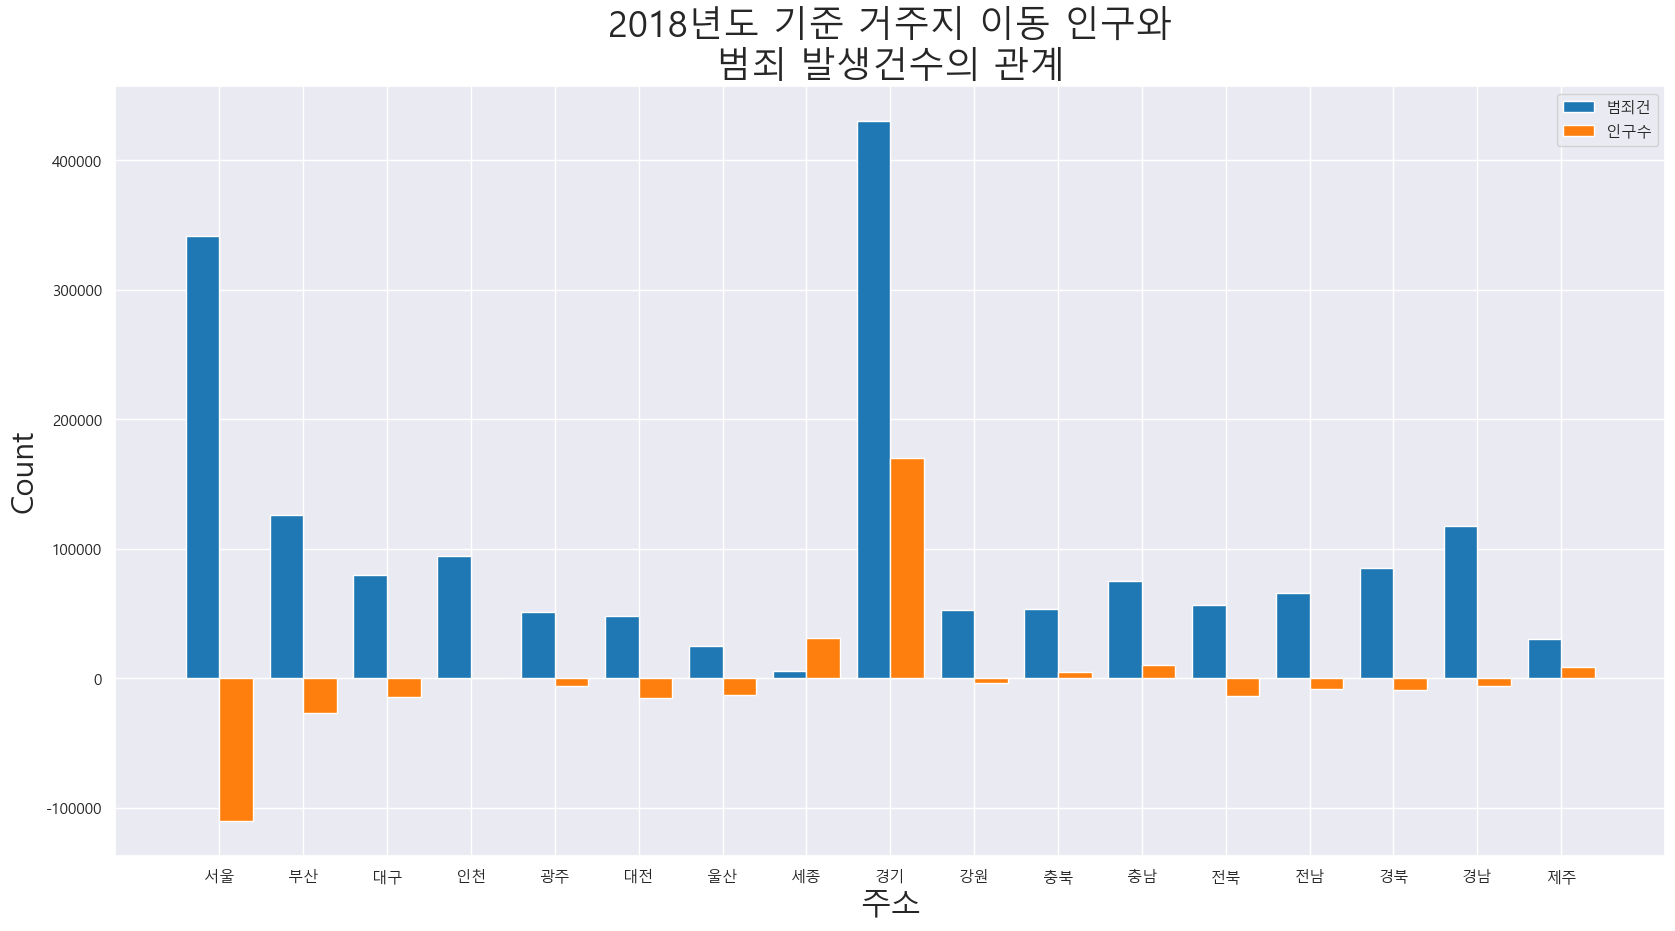

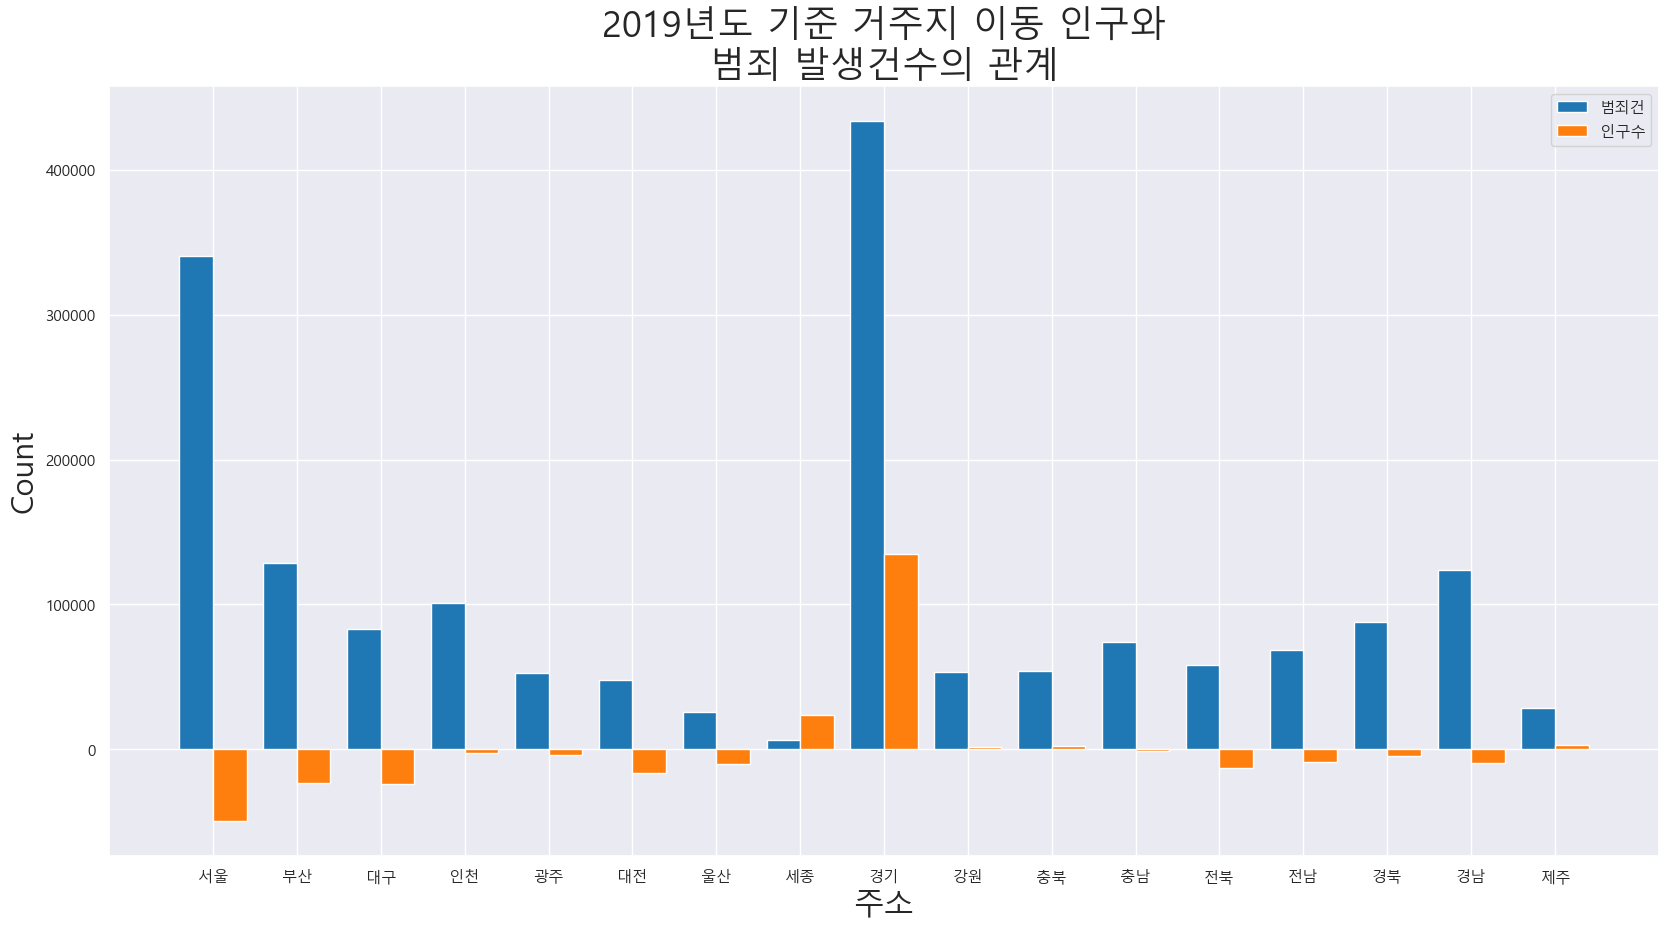

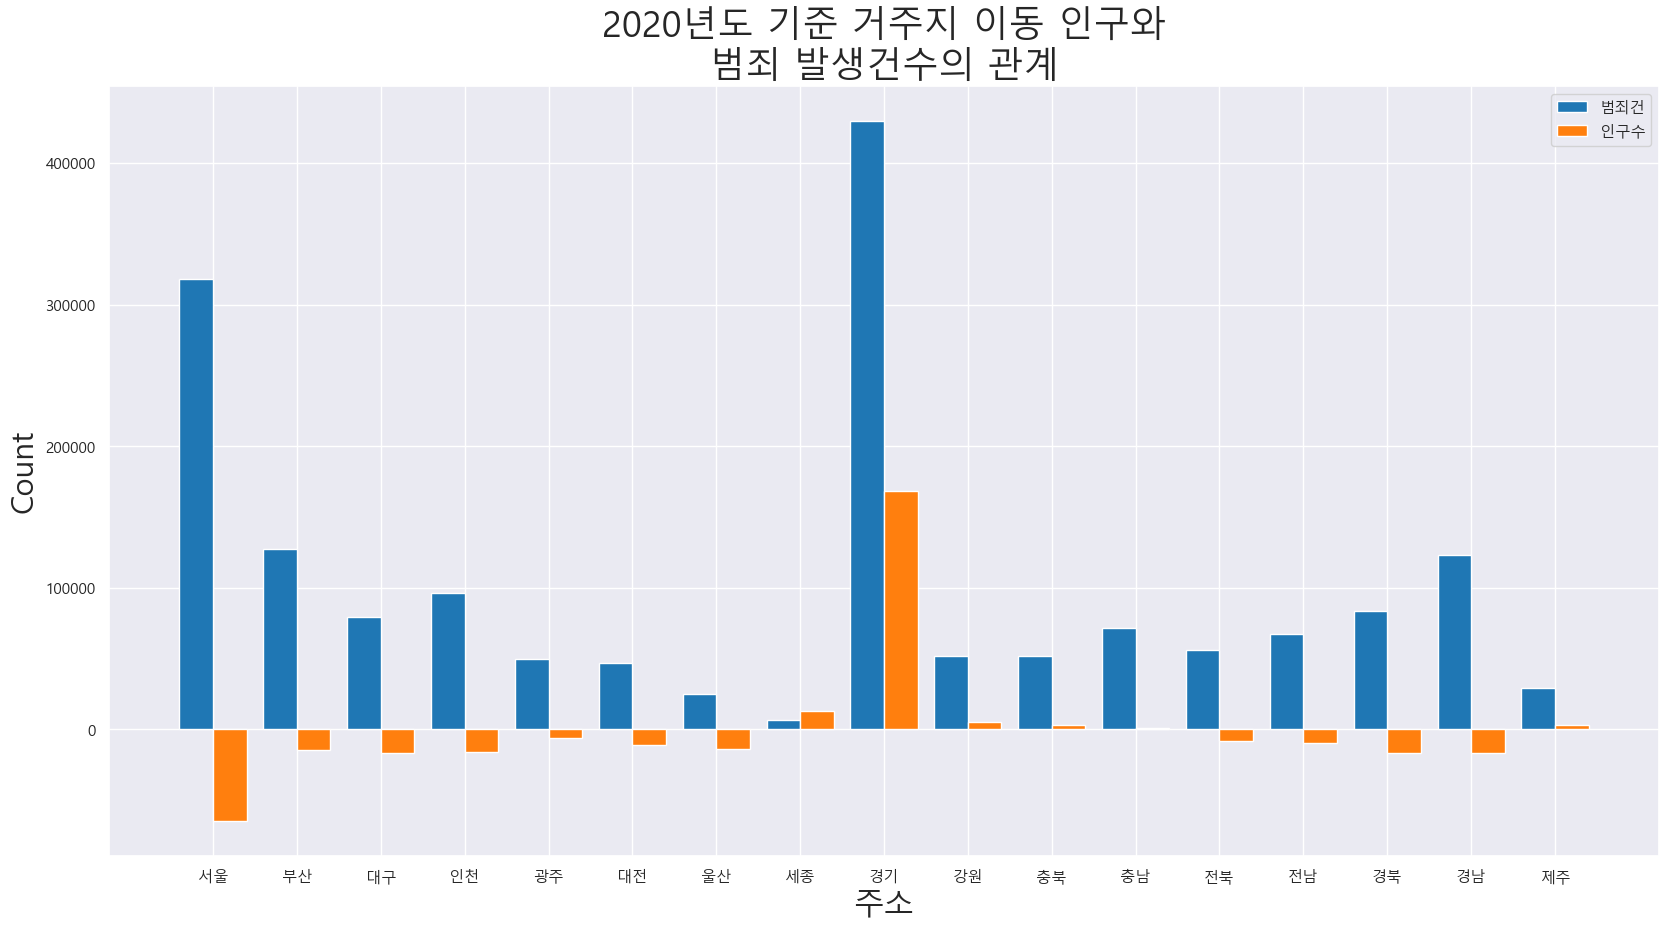

In [132]:
for year in years:
    crimeData = crimes_diary.loc[:, ["address", year]]
    populationData = population_doc.loc[:, ["address", year]]

    X_axis = np.arange(len(crimeData))

    plt.figure(figsize=(20, 10))

    plt.bar(X_axis - 0.2, crimeData[year], 0.4, label="범죄건")
    plt.bar(X_axis + 0.2, populationData[year], 0.4, label="인구수")

    plt.xticks(X_axis, crimeData["address"])
    plt.xlabel("주소", fontsize=22)
    plt.ylabel("Count", fontsize=22)
    plt.title(year+"년도 기준 거주지 이동 인구와\n범죄 발생건수의 관계", fontsize=26)
    plt.legend()
    plt.show()